In [1]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

In [25]:
import src.music.mir 
reload(src.music.mir)
from src.music.mir import MusicInformationRetreiver

mir = MusicInformationRetreiver(weights_path='mir_weights/', fps=20)

2024-08-12 23:20:51.417224: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:03.0 name: NVIDIA L4 computeCapability: 8.9
coreClock: 2.04GHz coreCount: 58 deviceMemorySize: 21.95GiB deviceMemoryBandwidth: 279.44GiB/s
2024-08-12 23:20:51.417253: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-08-12 23:20:51.417265: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-12 23:20:51.417270: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-08-12 23:20:51.417275: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:  

In [29]:
music_path = 'assets/Folly Audio/Meditation Music_moderatearousal.mp3'
music_segments, onset_env = mir(music_path, add_segment_info=True)

  0%|          | 0/7 [00:00<?, ?it/s]

2024-08-12 23:21:43.299544: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:00:03.0 name: NVIDIA L4 computeCapability: 8.9
coreClock: 2.04GHz coreCount: 58 deviceMemorySize: 21.95GiB deviceMemoryBandwidth: 279.44GiB/s
2024-08-12 23:21:43.299576: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1766] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2024-08-12 23:21:43.299587: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-08-12 23:21:43.299592: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-08-12 23:21:43.299597: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:  

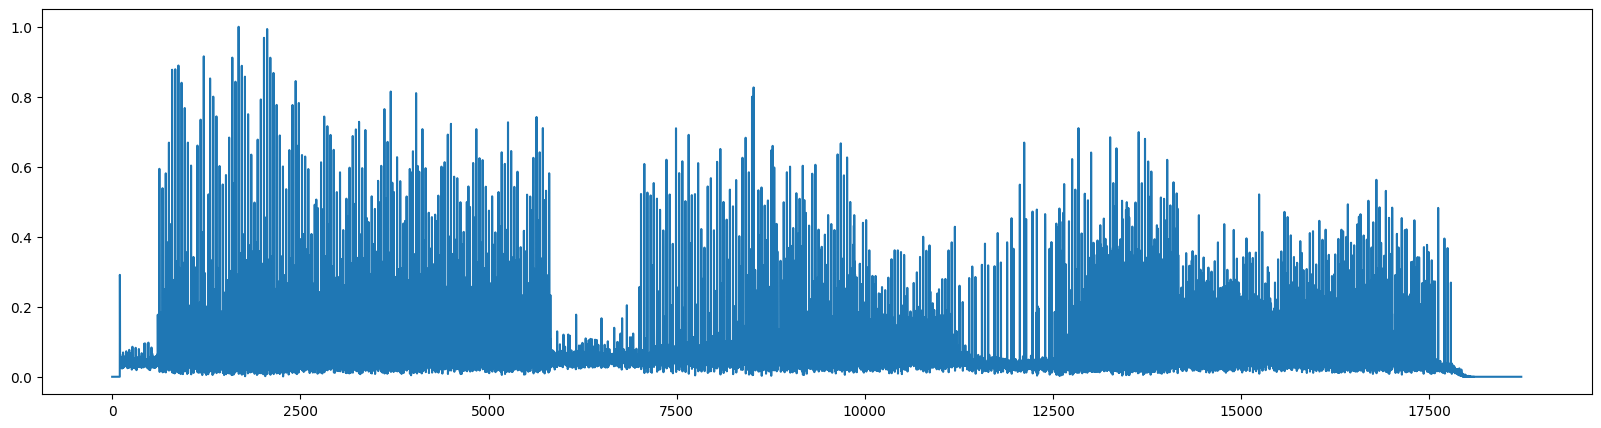

In [43]:
plt.figure(figsize=(20,5))
plt.plot(onset_env)

In [37]:
import matplotlib.pyplot as plt
import numpy as np

def plot_segments(segments, add_text=True):
    segments.sort(key=lambda x: x['start'])
    fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)

    colors = plt.cm.rainbow(np.linspace(0, 1, len(segments)))
    for idx, seg in enumerate(segments):
        rect = plt.Rectangle(
            xy=(seg['start'], 0), 
            width=seg['end'] - seg['start'], 
            height=1, facecolor=colors[idx], alpha=0.5, edgecolor='black'
        )
        ax.add_patch(rect)
        
        if add_text:
            ax.text(
                x=(seg['start'] + seg['end']) / 2, 
                y=0.5, 
                s='\n'.join(seg['genre'] + seg['instrument']), 
                ha='center', va='center', fontsize=8, fontweight='bold', wrap=True
            )

    ax.set_ylim(0, 1)
    ax.set_yticks([])
    ax.set_ylabel('Segments')
    ax.set_xlim(min(seg['start'] for seg in segments), max(seg['end'] for seg in segments))

    plt.tight_layout()
    plt.show()


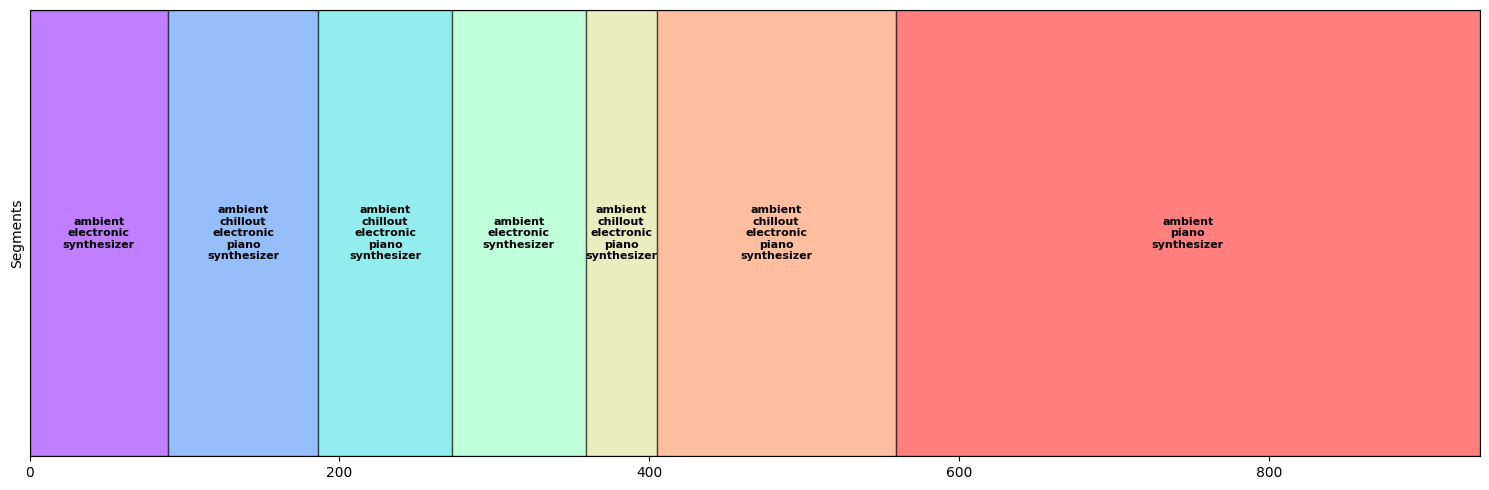

In [38]:
plot_segments(music_segments, add_text=True)

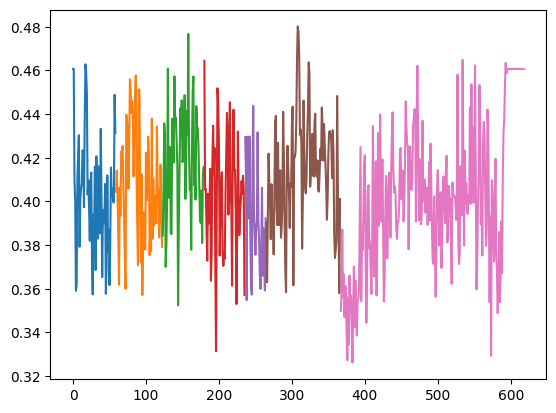

In [41]:
pre = 0
for i, seg in enumerate(music_segments):
    x = range(pre, pre + len(seg['valence']))
    plt.plot(x, seg['valence'])
    pre += len(seg['valence'])